In [1]:
import numpy as np
import gym
import math
import torch as T
import random
from EnvGym import MyEnv
from sac_agent import SAC_Agent
import time
import matplotlib.pyplot as plt

In [2]:
s0 = 100 # initial mid-price

T = 1 # terminal time

sigma = 2 # volatility

gamma = 0.1 # risk aversion parameter

k = 1.5 # k = alpha*K and this is determined by the market order size

A = 140 # scaling factor that depends on frequency  of market buy or sell orders and market order size

N_prices = 100

dt = 1/ N_prices # time step

In [3]:
env = MyEnv(s0, sigma, dt, N_prices, A, k)

agent = SAC_Agent([3], env=env)

train_start = time.time()
epochs_start = time.time()

epoch_num = 10

train_rewards = np.empty(shape=epoch_num)
for epoch in range(epoch_num):
    print("EPOCH: ", epoch)
    
    env.reset()


    # --------------------------------------------- now i have state I am at now
    done = False
    while not done:

        print("State now: ", env.state_now)

        action = agent.pick_action(env.state_now)
        print("Action I pick: ", action)
        state_now = env.state_now
   
        # --------------------------------------------- now i also have action I would like to take
            
        state_next, reward, done, _, _ = env.step(action)

        print("State I arrived: ", env.state_now)


        agent.remember(state_now, action, reward, state_next, done)
        print()
    
    agent.learn()



    # save cumulative reward for epoch
    train_rewards[epoch] = env.reward_total
    print()


C:\Users\dusan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


EPOCH:  0
State now:  (100, 1, 0)
mu, sigma =  tensor([ 0.7826, -0.1232], grad_fn=<ViewBackward0>) tensor([4.8152, 0.1089], grad_fn=<ClampBackward1>)
Action I pick:  [104.          -0.33591658]
Bid:  104.17  Price:  100  Ask:  103.83
Hit Bid
State I arrived:  (100.18798384126315, 0.99, 0.01)

State now:  (100.18798384126315, 0.99, 0.01)
mu, sigma =  tensor([ 0.7830, -0.1234], grad_fn=<ViewBackward0>) tensor([4.8225, 0.1090], grad_fn=<ClampBackward1>)
Action I pick:  [-28.09975     -0.32538423]
Bid:  -27.94  Price:  100.19  Ask:  -28.26
Hit Ask
State I arrived:  (99.92752871161667, 0.98, 0.0)

State now:  (99.92752871161667, 0.98, 0.0)
mu, sigma =  tensor([ 0.7799, -0.1229], grad_fn=<ViewBackward0>) tensor([4.8107, 0.1085], grad_fn=<ClampBackward1>)
Action I pick:  [14.636744    0.02340511]
Bid:  14.63  Price:  99.93  Ask:  14.65
Hit Ask
State I arrived:  (100.01760610940404, 0.97, 0.01)

State now:  (100.01760610940404, 0.97, 0.01)
mu, sigma =  tensor([ 0.7795, -0.1229], grad_fn=<ViewB

ValueError: Expected parameter loc (Tensor of shape (2,)) of distribution Normal(loc: torch.Size([2]), scale: torch.Size([2])) to satisfy the constraint Real(), but found invalid values:
tensor([nan, nan], grad_fn=<ViewBackward0>)

In [ ]:
train_rewards


array([ -791.95321241,  -973.38148811,  -934.52895319,  -782.17971923,
       -1128.27806847,  -266.05392401,  -478.6148209 ,  -477.27283626,
           0.        ,     0.        ])

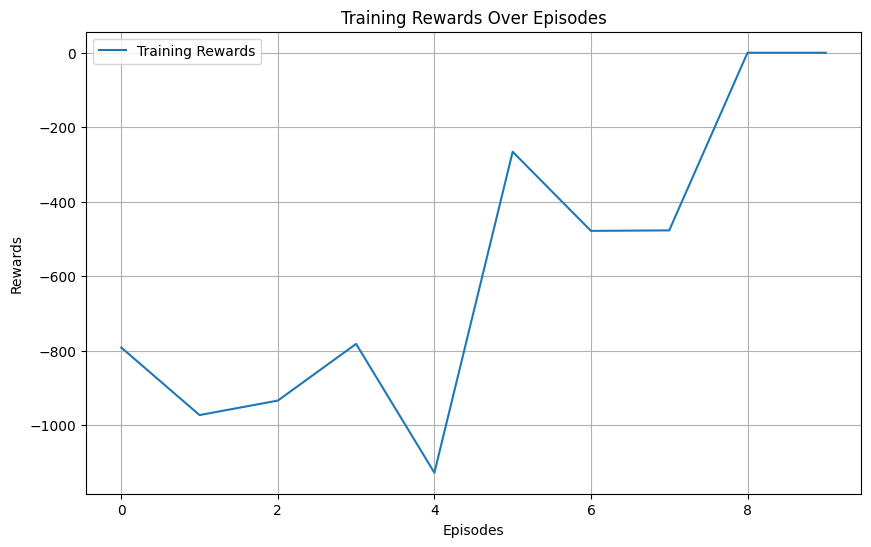

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_rewards, label='Training Rewards', linestyle='-')
plt.title('Training Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.grid(True)
plt.savefig('training_rewards_plot.png')
plt.show()